Just some setup so we can run all of the code

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from skimage.filters import sobel as edge
# from IPython.display import display
# from skimage.color import rgb2gray
def load_image(path):
    return np.uint8(np.array(Image.open(path)))

def show_image(img_arg):
    plt.imshow(img_arg, cmap = plt.cm.gray)
    # imshow(img_arg)
    # img_arg.show()
    # display(Image.fromarray(img_arg))

Load an image, print its dimensions, and display it


Image's dimensions: 276 x 221 x 3


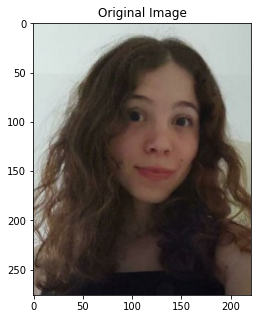

In [2]:
img = load_image("images/1.jpg")
print(f"\nImage's dimensions: {img.shape[0]} x {img.shape[1]} x {img.shape[2]}")

plt.figure(1, figsize=(10,5))
show_image(img)
plt.title('Original Image');

Every image is a 3D array: M x N pixels, where each pixel is an array of 3 channels: R, G, B.

In the following example, we display every channel separately, by zeroing out the other two channels.

In [ ]:
r = img.copy()
r[:,:,1] = 0
r[:,:,2] = 0

g = img.copy()
g[:,:,0] = 0
g[:,:,2] = 0

b = img.copy()
b[:,:,0] = 0
b[:,:,1] = 0

plt.figure(2, figsize=(20,10));
plt.subplot(1,3,1);
show_image(r)
plt.title('R');
plt.subplot(1,3,2);
show_image(g)
plt.title('G');
plt.subplot(1,3,3);
show_image(b)
plt.title('B');

Next, we want to create a grayscale image from an RGB image.

To create grayscale from RGB we would intuitively imply average the three channels.

However, we should account for human perception (our eyes are more sensitive to some wavelengths than others).
So we form a WEIGHTED average to account for this.
We’re more sensitive to green than other colors, so green is weighted most heavily. 
The formula for luminosity is 0.21 R + 0.72 G + 0.07 B

In [ ]:
img = load_image("images/2.jpg")
def to_grayscale(img_arg):
    return np.uint8(np.dot(img[...,:3], [0.21, 0.72, 0.07]))
grayscale = to_grayscale(img)

# Or we can just use an API that does this exact thing for us:
# from skimage.color import rgb2gray
# grayscale = rgb2gray(img)

plt.figure(3, figsize=(20,10));
plt.subplot(1,2,1);
show_image(img)
plt.title('RGB');
plt.subplot(1,2,2);
show_image(grayscale)
plt.title('gray');

The next example shows what happens if we just take 200x200 pixels from an image, and display just them in the same frame size.

Then, we take the small image and display it with different quantization levels!

In [ ]:
img = load_image("images/3.jpg")
grayscale = to_grayscale(img)
smallPic = grayscale[285:685,340:740]; # on smallPic - change the values to the "important" part of the image

plt.figure(4, figsize=(20,10));
plt.subplot(1,2,1);
show_image(grayscale);
plt.title('gray');
plt.subplot(1,2,2);
show_image(smallPic);
plt.title('gray-"zoom" : display only 200x200 pixels')

m = [1, 2, 4, 5, 8, 10, 20, 40, 50];
rows, cols = smallPic.shape
# assert rows == 200, f"should create a 200x200 image in smallPic, instead got {rows} rows X {cols} columns"
assert rows == cols, f"should create a square image in smallPic, instead got {rows} rows X {cols} columns"

quant = list()
for j in m:
    tmpPic = smallPic.copy();
    for i in range(0, rows - 1, j):
        for k in range(0, cols - 1, j):
            surrounding = smallPic[i : i + j, k : k + j]
            pixel_value = np.uint8(np.average(surrounding))
            tmpPic[i : i + j, k : k + j] = pixel_value
    quant.append(tmpPic)
    
plt.figure(5, figsize=(20, 20));
for i, pic in enumerate(quant):
    plt.subplot(3, 3, i + 1)
    show_image(pic)
    j = m[i]
    plt.title(f'avg {j} * {j} pixels --> ONE pixel');

How can we invert an image (turn dark areas to bright, and the other way around)?

In [ ]:
img = load_image("images/4.jpg")
grayscale = to_grayscale(img)
newImg = 255 - grayscale
plt.figure(6, figsize=(20, 10))
plt.subplot(1, 2, 1)
show_image(grayscale)
plt.subplot(1, 2, 2)
show_image(newImg)

What if we are only interested in making edges (borders) stand out?

In [ ]:
img = load_image("images/5.jpg")
img = to_grayscale(img)
plt.figure(6, figsize=(20, 10))
plt.subplot(1, 2, 1)
show_image(img)
plt.subplot(1, 2, 2)
show_image(edge(img))

Edge detection is useful for computer vision. Think of autonomous vehicles that need to understand if they fit in some place!

The specific way we calculated edges here is by going across rows and looking for big differences in values, and the same for columns. But this method has a downside: it fails to detect edges that are not vertical or horizontal. You can see that in the above image!

Next, we'll see how quantization affects colors!

In [ ]:
orig = load_image("images/6.jpg")
plt.figure(6, figsize=(10, 11))
plt.subplot(2, 2, 1)
show_image(orig)
plt.title('Original Image\n(256^3 = 16M colors)')

# to obtain 8 colors, we round each cell to the nearest quantization level out of:
# 16, 48, 80, 112, 144, 176, 208, 240 (so 0..31 --> 16 , 32..63 --> 48, etc..)
# generally, to obtain N colors, calculate X = 256 / N, then the levels are 0.5X, 1.5X, 2.5X, ...
# then each pixel's quantization level is pixel floored to a multiple of X (0..31 --> 0), then added 0.5X.
def quantize(image, num_levels):
    x = 256 // num_levels
    return np.uint8(np.floor_divide(image, x) * x + x / 2)

img8 = quantize(orig, 8)
img4 = quantize(orig, 4)
img2 = quantize(orig, 2)
        
# plt.figure(7, figsize=(20, 10));
plt.subplot(2,2,2);
show_image(img8);
plt.title('quantization to 8 colors / channel\n(8^3 = 512 total colors)');
plt.subplot(2,2,3);
show_image(img4);
plt.title('quantization to 4 colors / channel\n(4^3 = 64 total colors)');
plt.subplot(2,2,4);
show_image(img2);       
plt.title('quantization to 2 colors / channel\n(2^3 = 8 total colors)');

Can you guess how would quantization to 1 level per channel look like?

In [ ]:
img1 = quantize(orig, 1)
plt.figure(8, figsize=(20, 3))
show_image(img1)
plt.title('quantization to 1 colors / channel (1^3 = 1 total color)');